In [54]:
# importing libraries
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# reading data
melb_data = pd.read_csv('Data/melb_data.csv')

In [56]:
# examining data
melb_data.head()

(13580, 21)

In [67]:
# setting 'Price' column as target for predctions
y = melbourne_data.Price

#features preparation
features = melb_data.drop(['Price'], axis=1) # remove 'Price' column

# only numerical predicators
X = features.select_dtypes(exclude=['object'])

# divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [68]:
# function for comparing different approaches in missing values

def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=10)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [69]:
# approach 1 - drop columns with missing values

def drop_columns(X_train, X_valid):
    # retrieve names of columns with missing values
    cols_with_missing_values = [col for col in X_train.columns if X_train[col].isnull().any()]

    #drop columns from dataset | axis=0 - row, axis=1 - column
    reduced_X_train = X_train.drop(cols_with_missing_values, axis=1)
    reduced_X_valid = X_valid.drop(cols_with_missing_values, axis=1)
    
    return [reduced_X_train, reduced_X_valid]

In [70]:
# scoring of 1st approach

# drop columns with missing values
reduced_X_train, reduced_X_valid = drop_columns(X_train, X_valid)

# predict and evaluating MAE
MAE_drop_column = score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid)
MAE_drop_column

181715.7551528859

In [71]:
# approach 2 - replacing missing values with the mean value along each column

def imputation_dataset(X_train, X_valid):
    # define imputer
    imputer = SimpleImputer()

    # transform datasets
    imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
    imputed_X_valid = pd.DataFrame(imputer.transform(X_valid))
    
    # add columns' names
    imputed_X_train.columns = X_train.columns
    imputed_X_valid.columns = X_valid.columns
    
    return [imputed_X_train, imputed_X_valid]

In [72]:
# scoring of 2nd approach

# imputation missing values
imputed_X_train, imputed_X_valid = imputation_dataset(X_train, X_valid)

# predict and evaluating MAE
MAE_imputation = score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid)
MAE_imputation

178946.13161512028

In [73]:
# approach 3 - replacing missing values with the mean value along each column and mark which values were imputed

# copy of original datasets
X_train_extn = X_train.copy()
X_valid_extn = X_valid.copy()

cols_with_missing_values = [col for col in X_train.columns if X_train[col].isnull().any()]

def imputation_with_mark_dataset(X_train, X_valid):
    # add new column
    for col in cols_with_missing_values:
        X_train_extn[col + '_was_missing'] = X_train_extn[col].isnull()
        X_valid_extn[col + '_was_missing'] = X_valid_extn[col].isnull()
    
    # return imputation function result
    return imputation_dataset(X_train_extn, X_valid_extn)

In [74]:
# scoring of 3rd approach

# imputation missing values with mark
mark_imputed_X_train, mark_imputed_X_valid = imputation_with_mark_dataset(X_train, X_valid)

# predict and evaluating MAE
MAE_mark_imputation = score_dataset(mark_imputed_X_train, mark_imputed_X_valid, y_train, y_valid)
MAE_mark_imputation

177984.30143593522

In [75]:
# create list of MAEs
mae_list = [MAE_drop_column, MAE_imputation, MAE_mark_imputation]

# mae rescaling
# for m in range(0, len(mae_list)):
#     mae_list[m] = mae_list[m] / 10000

Text(0, 0.5, 'Mean Absolute Error')

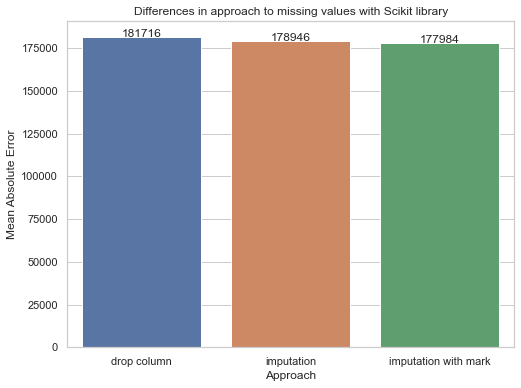

In [76]:
# visualizing differences in approach to missing values

# plot area size
plt.figure(figsize=(8,6))

# style
sns.set_theme(style="whitegrid")

# plot title
plt.title("Differences in approach to missing values with Scikit library")

# define barplot
mae_barplot = sns.barplot(x=['drop column', 'imputation', 'imputation with mark'], y=mae_list)

# set data labels
for p in mae_barplot.patches:
    # get the height of each bar
    height = p.get_height()
    # adding text to each bar
    mae_barplot.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+100, # y-coordinate position of data label, padded 100 above bar
    s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
    ha = 'center') # sets horizontal alignment (ha) to center

# axis labels
plt.xlabel("Approach")
plt.ylabel("Mean Absolute Error")